# IMDB SENTIMENT ANALYSIS
Using the IMDB reviews to carry out sentiment analysis and create unigram and bigram wordclouds. 

## BUSINESS OBJECTIVE
* Maximize Profit
* Minimize Churn Rate
* Maximize Service Quality

## CONSTRAINTS
* Cyber Attacks
* Fraudulent Activity

Importing the required libraries. 

In [1]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException 
from selenium.common.exceptions import ElementNotVisibleException
from selenium.webdriver.common.by import By
import time
import numpy as np

__WEB SCRAPPING__

Creating empty reviews list.

In [2]:
reviews=[]

Loading the review pages upto 10 clicks on to the browser.

In [3]:
path=r"C:\Users\lenny\Downloads\chromedriver.exe" #location path of the chrome driver is specified
browser = webdriver.Chrome(path) # opens the chrome browser
url= "https://www.imdb.com/title/tt0816711/reviews?ref_=tt_urv"
browser.get(url) # opens the given url
i=1 #Initializing the number of times the load more button is to be clicked. 
# Below while loop is to load all the reviews into the browser 
while (i<10):
    i=i+1
    try:
        # Storing the load more button page id which we will be using to automate the clicks through selenium 
        button = browser.find_element(By.ID,'load-more-trigger')
        button.click()
        time.sleep(5)
    except NoSuchElementException:
        break
    except ElementNotVisibleException:
        break

C:\Users\lenny\AppData\Local\Temp\ipykernel_22116\548923264.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome(path) # opens the chrome browser


In [4]:
# Getting the page source for the entire imdb after loading all the reviews
ps = browser.page_source 
#Converting page source into Beautiful soup object
soup=bs(ps,"html.parser")

Adding the reviews one by one into the empty reviews list. 

In [5]:
#Extracting the reviews present in div html_tag having class containing "text" in its value
reviews = soup.findAll("div",attrs={"class","text"})
for i in range(len(reviews)):
    reviews[i] = reviews[i].text

All the reviews are stored in a list. 

In [6]:
reviews

['Out of all of the zombie based films this is one of my favourites, a really good story from a different angle of a specialist rather than a hero with a gun. Brilliant ending as-well which is always a bonus.',
 'At the end of World War Z, just as the credits began rolling, a gentleman, scratch that, an idiot spoke up from the back of the theatre exclaiming, "What? That sucked! The book was nothing like that! Booo!" I\'m sure he scurried away back home, logged online, and began tweeting, posting, and blogging, furthering his rant. Much like my response to him at the theatre, I hope he receives silence in return.It\'s true, World War Z is nothing like the book. The book is told from the point of view AFTER the war. It\'s a "historical," account of what happened during the war. Rather than make a mockumentary with flashbacks, which would have been the wrong decision in my opinion, the filmmakers decided to put us right in the middle of the action.When adapting a piece of literature it is

Joining all the reviews to form a string. 

In [7]:
string=" ".join(reviews)
string

'Out of all of the zombie based films this is one of my favourites, a really good story from a different angle of a specialist rather than a hero with a gun. Brilliant ending as-well which is always a bonus. At the end of World War Z, just as the credits began rolling, a gentleman, scratch that, an idiot spoke up from the back of the theatre exclaiming, "What? That sucked! The book was nothing like that! Booo!" I\'m sure he scurried away back home, logged online, and began tweeting, posting, and blogging, furthering his rant. Much like my response to him at the theatre, I hope he receives silence in return.It\'s true, World War Z is nothing like the book. The book is told from the point of view AFTER the war. It\'s a "historical," account of what happened during the war. Rather than make a mockumentary with flashbacks, which would have been the wrong decision in my opinion, the filmmakers decided to put us right in the middle of the action.When adapting a piece of literature it is impo

Storing all the reviews in a dataframe called df, this dataframe will be used to carry out sentiment analysis. 

In [8]:
df= pd.DataFrame(columns = ["Review"])
df["Review"] = reviews

__DATA CLEANING__

Converting all the letters in the string to lowercase letters. 

In [9]:
text = string.lower()
text

'out of all of the zombie based films this is one of my favourites, a really good story from a different angle of a specialist rather than a hero with a gun. brilliant ending as-well which is always a bonus. at the end of world war z, just as the credits began rolling, a gentleman, scratch that, an idiot spoke up from the back of the theatre exclaiming, "what? that sucked! the book was nothing like that! booo!" i\'m sure he scurried away back home, logged online, and began tweeting, posting, and blogging, furthering his rant. much like my response to him at the theatre, i hope he receives silence in return.it\'s true, world war z is nothing like the book. the book is told from the point of view after the war. it\'s a "historical," account of what happened during the war. rather than make a mockumentary with flashbacks, which would have been the wrong decision in my opinion, the filmmakers decided to put us right in the middle of the action.when adapting a piece of literature it is impo

Remove single quote early since it causes problems with the tokenizer.

In [10]:
text = text.replace("'", "")
text

'out of all of the zombie based films this is one of my favourites, a really good story from a different angle of a specialist rather than a hero with a gun. brilliant ending as-well which is always a bonus. at the end of world war z, just as the credits began rolling, a gentleman, scratch that, an idiot spoke up from the back of the theatre exclaiming, "what? that sucked! the book was nothing like that! booo!" im sure he scurried away back home, logged online, and began tweeting, posting, and blogging, furthering his rant. much like my response to him at the theatre, i hope he receives silence in return.its true, world war z is nothing like the book. the book is told from the point of view after the war. its a "historical," account of what happened during the war. rather than make a mockumentary with flashbacks, which would have been the wrong decision in my opinion, the filmmakers decided to put us right in the middle of the action.when adapting a piece of literature it is impossible

Tokenizing.

In [11]:
tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

Removing extra characters. 

In [12]:
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

In [13]:
text_string=' '.join(text_content)
text_string

'out of all of the zombie based films this is one of my favourites  a really good story from a different angle of a specialist rather than a hero with a gun  brilliant ending aswell which is always a bonus  at the end of world war z  just as the credits began rolling  a gentleman  scratch that  an idiot spoke up from the back of the theatre exclaiming   what  that sucked  the book was nothing like that  booo   im sure he scurried away back home  logged online  and began tweeting  posting  and blogging  furthering his rant  much like my response to him at the theatre  i hope he receives silence in returnits true  world war z is nothing like the book  the book is told from the point of view after the war  its a  historical   account of what happened during the war  rather than make a mockumentary with flashbacks  which would have been the wrong decision in my opinion  the filmmakers decided to put us right in the middle of the actionwhen adapting a piece of literature it is impossible to

Replacing the nice with good as both mean the same. 

In [14]:
text_string=text_string.replace('nice','good')

Removing the emoji's and extra shapes. 

In [15]:
text_content = re.sub("[^A-Za-z" "]+", " ",text_string).split()

Creating a set of stopwords.

In [16]:
stopwords_wc = set(STOPWORDS)
customised_words = ['sit','brad','back','u','much','man','well','pit','one','father','divorce','director','part','want','doesnt','didnt','dont','know','lawyer','way','ive','seen','world','list','little','bit','war','opening','credit','run','away','title','sequence','airline','pilot','home','first','long','s','another','especially','something','doctor','end','go','tell','check','seem','never','catch','z','hanratty','me','if','you','can','jennifer','garner','agent','carl','brenda','john','williams','nathalie','baye','williams','amy','adam','di','caprio','jeff','kaminski','janusz','nathanson','brenda','martin','sheen','spielberg','dicaprio','christopher','walken','frank','abagnale','jr','tom','hank','actor','fbi','leonardo','character','make','see','even','inside','thing','character','film','take','movie','thus','brands','month','lot','ah','ago','r','w','a'] 

new_stopwords = stopwords_wc.union(customised_words)

Removing the stop words

In [17]:
text_content = [word for word in text_content if word not in new_stopwords]

Taking  only non-empty entries

In [18]:
text_content = [s for s in text_content if len(s) != 0]

Carrying out lemmatization. 

In [19]:
WNL = nltk.WordNetLemmatizer()
text_content = [WNL.lemmatize(t) for t in text_content]

Again converting it back into strings.

In [20]:
text_string1=' '.join(text_content)
text_string1

'zombie based film favourite really good story different angle specialist rather hero gun brilliant ending aswell always bonus credit began rolling gentleman scratch idiot spoke theatre exclaiming sucked book nothing booo im sure scurried logged online began tweeting posting blogging furthering rant response theatre hope receives silence returnits true nothing book book told point view historical account happened rather mockumentary flashback wrong decision opinion filmmaker decided put u right middle actionwhen adapting piece literature impossible bring every page every paragraph every nuance onto screen come close depending material creative license called adaptation reason call copy mimicwhere work thats mouthful many others fail slip total utter chaos mean government military law enforcement agency quite opposite anything scenario bring best general un delegate scientist trying solve complex issue anything rather going hiding act society crumble band cannibal leather strapped gang 

__Cleaning the reviews in the dataframe__

Converting the reviews into lowercase.

In [21]:
df['Review']=df['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Review']

0      out of all of the zombie based films this is o...
1      at the end of world war z, just as the credits...
2      the world descends into the zombie apocalypse....
3      the world ignores the signs of global disaster...
4      i'm generally not a fan of zombie movies, not ...
                             ...                        
244    to watch this movie during this pandemic, make...
245    after reading tons of reviews on imdb about ho...
246    the fact that 'world war z' has finally been r...
247    okay, no, it doesn't have the political implic...
248    this movie is absolutely terrible, the cliche ...
Name: Review, Length: 249, dtype: object

Removing all extra characters,numbers and emojis. 

In [22]:
df['Review']=df['Review'].str.replace('[^a-z" "]+','')
df['Review']

C:\Users\lenny\AppData\Local\Temp\ipykernel_22116\374160037.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace('[^a-z" "]+','')


0      out of all of the zombie based films this is o...
1      at the end of world war z just as the credits ...
2      the world descends into the zombie apocalypse ...
3      the world ignores the signs of global disaster...
4      im generally not a fan of zombie movies not be...
                             ...                        
244    to watch this movie during this pandemic makes...
245    after reading tons of reviews on imdb about ho...
246    the fact that world war z has finally been rel...
247    okay no it doesnt have the political implicati...
248    this movie is absolutely terrible the cliche h...
Name: Review, Length: 249, dtype: object

Replacing similar meaning words with good. 

In [23]:
df['Review']=df['Review'].str.replace('nice','good')
df['Review']=df['Review'].str.replace('best','good')
df['Review']=df['Review'].str.replace('great','good')


Removing all the stopwords from the reviews. 

In [24]:
df['Review']=df['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in new_stopwords))
df['Review']

0      zombie based films favourites really good stor...
1      credits began rolling gentleman scratch idiot ...
2      descends zombie apocalypse sort virus bitten p...
3      ignores signs global disaster next wide zombie...
4      im generally fan zombie movies rather easily e...
                             ...                        
244    watch pandemic makes creepier imagine pandemic...
245    reading tons reviews imdb soso almost bad supp...
246    fact finally released miracle finding cure zom...
247    okay political implication book still read mov...
248    absolutely terrible cliche happy family kids k...
Name: Review, Length: 249, dtype: object

### UNIGRAM WORDCLOUD

Generating a unigram wordcloud. 

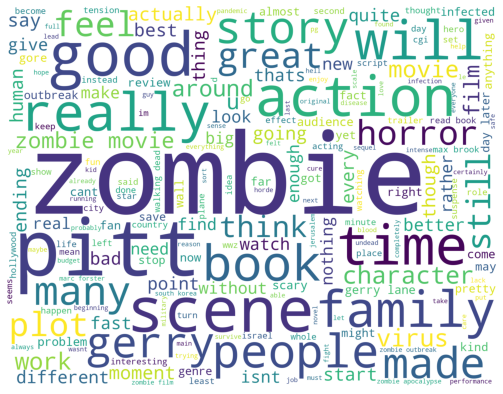

In [25]:
wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text_string1)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

### BIGRAM WORDCLOUD

Creating a list of bigrams using nltk library. 

In [26]:
bigrams_list = list(nltk.bigrams(text_content))
print(bigrams_list)

[('zombie', 'based'), ('based', 'film'), ('film', 'favourite'), ('favourite', 'really'), ('really', 'good'), ('good', 'story'), ('story', 'different'), ('different', 'angle'), ('angle', 'specialist'), ('specialist', 'rather'), ('rather', 'hero'), ('hero', 'gun'), ('gun', 'brilliant'), ('brilliant', 'ending'), ('ending', 'aswell'), ('aswell', 'always'), ('always', 'bonus'), ('bonus', 'credit'), ('credit', 'began'), ('began', 'rolling'), ('rolling', 'gentleman'), ('gentleman', 'scratch'), ('scratch', 'idiot'), ('idiot', 'spoke'), ('spoke', 'theatre'), ('theatre', 'exclaiming'), ('exclaiming', 'sucked'), ('sucked', 'book'), ('book', 'nothing'), ('nothing', 'booo'), ('booo', 'im'), ('im', 'sure'), ('sure', 'scurried'), ('scurried', 'logged'), ('logged', 'online'), ('online', 'began'), ('began', 'tweeting'), ('tweeting', 'posting'), ('posting', 'blogging'), ('blogging', 'furthering'), ('furthering', 'rant'), ('rant', 'response'), ('response', 'theatre'), ('theatre', 'hope'), ('hope', 'recei

Saving it into a dictionary to use it to create a wordcloud. 

In [27]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['zombie based', 'based film', 'film favourite', 'favourite really', 'really good', 'good story', 'story different', 'different angle', 'angle specialist', 'specialist rather', 'rather hero', 'hero gun', 'gun brilliant', 'brilliant ending', 'ending aswell', 'aswell always', 'always bonus', 'bonus credit', 'credit began', 'began rolling', 'rolling gentleman', 'gentleman scratch', 'scratch idiot', 'idiot spoke', 'spoke theatre', 'theatre exclaiming', 'exclaiming sucked', 'sucked book', 'book nothing', 'nothing booo', 'booo im', 'im sure', 'sure scurried', 'scurried logged', 'logged online', 'online began', 'began tweeting', 'tweeting posting', 'posting blogging', 'blogging furthering', 'furthering rant', 'rant response', 'response theatre', 'theatre hope', 'hope receives', 'receives silence', 'silence returnits', 'returnits true', 'true nothing', 'nothing book', 'book book', 'book told', 'told point', 'point view', 'view historical', 'historical account', 'account happened', 'happened ra

Using Tfidf vectoriser to view the frequency of bigrams. 

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'zombie based': 31224,
 'based film': 2052,
 'film favourite': 9510,
 'favourite really': 9195,
 'really good': 21889,
 'good story': 11355,
 'story different': 25915,
 'different angle': 6462,
 'angle specialist': 1038,
 'specialist rather': 25309,
 'rather hero': 21562,
 'hero gun': 12403,
 'gun brilliant': 11820,
 'brilliant ending': 3224,
 'ending aswell': 7475,
 'aswell always': 1620,
 'always bonus': 904,
 'bonus credit': 2872,
 'credit began': 5535,
 'began rolling': 2215,
 'rolling gentleman': 22757,
 'gentleman scratch': 10672,
 'scratch idiot': 23634,
 'idiot spoke': 13098,
 'spoke theatre': 25437,
 'theatre exclaiming': 27222,
 'exclaiming sucked': 8313,
 'sucked book': 26303,
 'book nothing': 2965,
 'nothing booo': 18173,
 'booo im': 3040,
 'im sure': 13180,
 'sure scurried': 26513,
 'scurried logged': 23756,
 'logged online': 15621,
 'online began': 18634,
 'began tweeting': 2218,
 'tweeting posting': 28601,
 'posting blogging': 20635,
 'blogging furthering': 2748,
 'furt

Creating a dictionary of word frequency. 

In [29]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('zombie movie', 77.0), ('gerry lane', 57.0), ('day later', 48.0), ('max brook', 42.0), ('read book', 39.0), ('walking dead', 38.0), ('zombie apocalypse', 37.0), ('zombie outbreak', 34.0), ('zombie film', 34.0), ('south korea', 29.0), ('special effect', 27.0), ('set piece', 26.0), ('marc forster', 25.0), ('un investigator', 24.0), ('action scene', 24.0), ('pg rating', 21.0), ('zombie genre', 21.0), ('united nation', 21.0), ('zombie flick', 21.0), ('former un', 20.0), ('plane crash', 20.0), ('source material', 20.0), ('dawn dead', 20.0), ('mireille enos', 18.0), ('quantum solace', 18.0), ('blood gore', 18.0), ('best zombie', 18.0), ('edge seat', 16.0), ('action sequence', 16.0), ('plot hole', 16.0), ('daniella kertesz', 16.0), ('fast paced', 15.0), ('lane pitt', 15.0), ('living dead', 15.0), ('week later', 15.0), ('korea israel', 15.0), ('really good', 14.0), ('pretty good', 14.0), ('zombie fan', 14.0), ('good zombie', 14.0), ('zombie attack', 13.0), ('fan zombie', 13.0), ('patient zer

Generating a bigram wordcloud

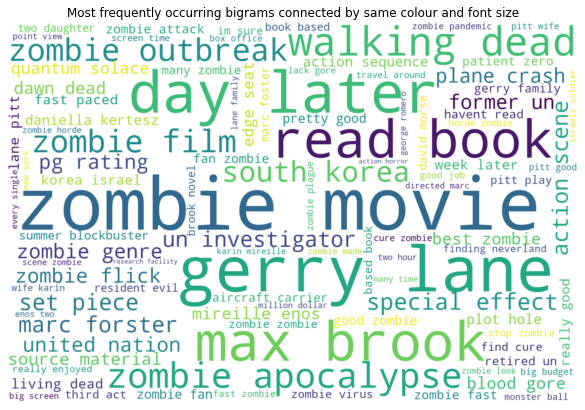

In [30]:
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(background_color='White',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(figsize=(15,7))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## SENTIMENT ANALYSIS

Using the vader Sentiment library to do sentiment analysis of each reviews, which will give an idea about the positive or negative reception of the movie among the reviewers. 

In [31]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Saving the reviews as list with in  a list. 

In [32]:
list_reviews=[]
for text in df['Review']:
    text=[text]
    list_reviews.append(text)
list_reviews

[['zombie based films favourites really good story different angle specialist rather hero gun brilliant ending aswell always bonus'],
 ['credits began rolling gentleman scratch idiot spoke theatre exclaiming "what sucked book nothing booo" im sure scurried logged online began tweeting posting blogging furthering rant response theatre hope receives silence returnits true nothing book book told point view "historical" account happened rather mockumentary flashbacks wrong decision opinion filmmakers decided put us right middle actionwhen adapting piece literature impossible bring every page every paragraph every nuance onto screen come close depending material creative licenses called "adaptation" reason call copy mimicwhere works thats mouthful many others fail slips total utter chaos mean governments military law enforcement agencies quite opposite anything scenarios bring good generals un delegates scientists trying solve complex issues anything rather going hiding act society crumble 

Using an empty list to store the polarity scores of each review, the final output will be a list of dictionaries. 

In [38]:
empty=[]
for e in range(0,len(df.Review)):   
    v=list_reviews[e]
    for sentence in v:
        ss = sid.polarity_scores(sentence) 
        empty.append(ss)
print(empty)

[{'neg': 0.081, 'neu': 0.441, 'pos': 0.478, 'compound': 0.9134}, {'neg': 0.14, 'neu': 0.732, 'pos': 0.128, 'compound': -0.7677}, {'neg': 0.208, 'neu': 0.634, 'pos': 0.158, 'compound': -0.7958}, {'neg': 0.145, 'neu': 0.674, 'pos': 0.181, 'compound': 0.5423}, {'neg': 0.145, 'neu': 0.595, 'pos': 0.26, 'compound': 0.9785}, {'neg': 0.258, 'neu': 0.363, 'pos': 0.379, 'compound': 0.25}, {'neg': 0.229, 'neu': 0.62, 'pos': 0.151, 'compound': -0.9314}, {'neg': 0.168, 'neu': 0.696, 'pos': 0.136, 'compound': -0.9334}, {'neg': 0.117, 'neu': 0.55, 'pos': 0.333, 'compound': 0.9661}, {'neg': 0.17, 'neu': 0.658, 'pos': 0.172, 'compound': 0.13}, {'neg': 0.13, 'neu': 0.62, 'pos': 0.25, 'compound': 0.991}, {'neg': 0.157, 'neu': 0.599, 'pos': 0.245, 'compound': 0.9924}, {'neg': 0.229, 'neu': 0.571, 'pos': 0.2, 'compound': -0.8174}, {'neg': 0.108, 'neu': 0.67, 'pos': 0.222, 'compound': 0.9702}, {'neg': 0.143, 'neu': 0.658, 'pos': 0.199, 'compound': 0.9456}, {'neg': 0.131, 'neu': 0.347, 'pos': 0.521, 'compou

Storing the polarity scores in a dataframe. 

In [39]:
df_sentiment=pd.DataFrame.from_dict(empty,orient='columns')
df_sentiment.head(5)

neg    neu    pos  compound
0  0.081  0.441  0.478    0.9134
1  0.140  0.732  0.128   -0.7677
2  0.208  0.634  0.158   -0.7958
3  0.145  0.674  0.181    0.5423
4  0.145  0.595  0.260    0.9785

Concatenating both df and df_sentiment to get the reviews and its polarity scores in a single dataframe.

In [40]:
df_c=pd.concat([df['Review'],df_sentiment],axis=1)
df_c.head(5)

Review    neg    neu    pos  \
0  zombie based films favourites really good stor...  0.081  0.441  0.478   
1  credits began rolling gentleman scratch idiot ...  0.140  0.732  0.128   
2  descends zombie apocalypse sort virus bitten p...  0.208  0.634  0.158   
3  ignores signs global disaster next wide zombie...  0.145  0.674  0.181   
4  im generally fan zombie movies rather easily e...  0.145  0.595  0.260   

   compound  
0    0.9134  
1   -0.7677  
2   -0.7958  
3    0.5423  
4    0.9785

Converting the polarity scores into a positive or negative sentiment using the compound values. So if the compound value is zero or greater then the review is positive but if its less than zero its negative. 

In [41]:
df_c['sentiment']=np.where(df_c['compound']>=0,'Positive','Negative')
df_c.head(5)

Review    neg    neu    pos  \
0  zombie based films favourites really good stor...  0.081  0.441  0.478   
1  credits began rolling gentleman scratch idiot ...  0.140  0.732  0.128   
2  descends zombie apocalypse sort virus bitten p...  0.208  0.634  0.158   
3  ignores signs global disaster next wide zombie...  0.145  0.674  0.181   
4  im generally fan zombie movies rather easily e...  0.145  0.595  0.260   

   compound sentiment  
0    0.9134  Positive  
1   -0.7677  Negative  
2   -0.7958  Negative  
3    0.5423  Positive  
4    0.9785  Positive

Creating a bar chart to understand the sentiments of the reviewers. 

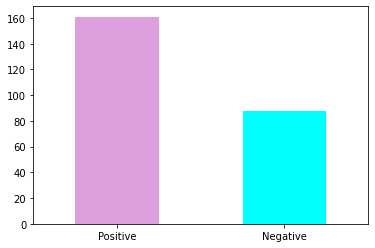

In [42]:
result=df_c['sentiment'].value_counts()
result.plot(kind='bar',rot=0,color=['plum','cyan']);

### CONCLUSION
From the sentiment analysis it is very clear that this film had a mix response by viewers , so this gives the Movie creators a perspective of the viewers and the improvements that are to be made to improve the movie experience of the customers.